In [53]:
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
 def get_data():
    A, B, S = [], [], []

    datasets = ['SICK_train.txt', 'SICK_trial.txt', 'SICK_test_annotated.txt']
    for data in datasets:
        for line in open(data, 'rb'):
            text = line.decode().strip().split('\t')
            A.append(text[1])
            B.append(text[2])
            S.append(text[3])
        A, B, S = A[1:], B[1:], S[1:]

    return A, B, S

In [79]:
A, B, S = get_data()
x, y = [], []
for i in range(len(A)):
    x.append(S[i])
    y.append(get_similarity(A[i], B[i])*5)

In [59]:
def get_similarity(a, b):
    stemmer = nltk.stem.porter.PorterStemmer()

    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

    def stem_tokens(tokens):
        return [stemmer.stem(item) for item in tokens]

    def normalize(text):
        text = text.lower().translate(remove_punctuation_map)
        return stem_tokens(nltk.word_tokenize(text))

    vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

    def cosine_sim(text1, text2):
        tfidf = vectorizer.fit_transform([text1, text2])
        return ((tfidf * tfidf.T).A)[0,1]
    
    return cosine_sim(a, b)

In [68]:
import matplotlib.pyplot as plt

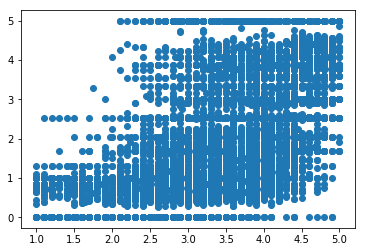

In [83]:
plt.scatter(x1, y1)
plt.show()

In [80]:
x1, y1 = [], []
for i in range(len(x)):
    if x[i] != 'relatedness_score':
        x1.append(x[i])
        y1.append(y[i])

In [84]:
from sklearn import linear_model

In [87]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x1).reshape(-1, 1), np.array(y1).reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 0.9479248]]


In [96]:
x1 = np.array(x1).astype(np.float64)
y1 = np.array(y1).astype(np.float64)

In [99]:
sum = 0
for i in range(len(x1)):
    sum += (x1[i] - y1[i])
sum /= len(x1)

In [100]:
sum

1.0199856721875873